In [4]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
df = pd.read_csv('data/stud.csv')

We will try to predict maths score using other variables

In [17]:
X = df.drop(columns = ['math score'],axis = 1)
y = df['math score']

In [19]:
X.head()
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [20]:
print('gender->',df['gender'].unique())
print('race/ethnicity->',df['race/ethnicity'].unique())
print('parental level of education->',df['parental level of education'].unique())
print('lunch->',df['lunch'].unique())
print('test preparation course->',df['test preparation course'].unique())


gender-> ['female' 'male']
race/ethnicity-> ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education-> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch-> ['standard' 'free/reduced']
test preparation course-> ['none' 'completed']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65


In [26]:
# Create column transforme with 3 types of transformers
num_features = X.select_dtypes(exclude = 'O').columns
cat_features = X.select_dtypes(include = 'O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)
# instead of applying onehot encoder on every categorical 
# feature indivisually we just make a preprocessor which 
# takes in categorical and numerical features and just apply Standardscaller 
# and onehot encoder on the resp group

In [28]:
X = preprocessor.fit_transform(X)

In [33]:
X.shape

(1000, 19)

In [35]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rms = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae, mse, r2_square

In [42]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()    

}
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # train model

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print(". Root Mean Square Error:{: .4f}".format(model_train_rmse))
    print(". Mean Absolute error{: .4f}".format(model_train_mae))
    print(". R2 score {: .4f}".format(model_train_r2))

    print('-'*50)

    print('Model performance for Test set')
    print(". Root Mean Square Error:{: .4f}".format(model_test_rmse))
    print(". Mean Absolute error{: .4f}".format(model_test_mae))
    print(". R2 score {: .4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('*'*50) # printing a strind of 35 astrics
    print('\n')



Linear Regression
Model performance for Training set
. Root Mean Square Error: 28.3941
. Mean Absolute error 4.2688
. R2 score  0.8741
--------------------------------------------------
Model performance for Test set
. Root Mean Square Error: 29.4290
. Mean Absolute error 4.2281
. R2 score  0.8791
**************************************************


Lasso
Model performance for Training set
. Root Mean Square Error: 43.4784
. Mean Absolute error 5.2063
. R2 score  0.8071
--------------------------------------------------
Model performance for Test set
. Root Mean Square Error: 42.5064
. Mean Absolute error 5.1579
. R2 score  0.8253
**************************************************


Ridge
Model performance for Training set
. Root Mean Square Error: 28.3378
. Mean Absolute error 4.2650
. R2 score  0.8743
--------------------------------------------------
Model performance for Test set
. Root Mean Square Error: 29.0563
. Mean Absolute error 4.2111
. R2 score  0.8806
*********************

RESULTS TIME!

In [43]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ['Model Name','R2_Score']).sort_values(by = ["R2_Score"],ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879061
5,RandomForestRegressor,0.852512
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.847187
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.742005


Linear Regression

In [44]:
lin_model = LinearRegression(fit_intercept=True) # fit_intercept specifies 
# whether we need to calculate intercept or not
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is {: .2f}".format(score))


Accuracy of the model is  87.91


Plot y_pred vs y_test

Text(0, 0.5, 'Predicted')

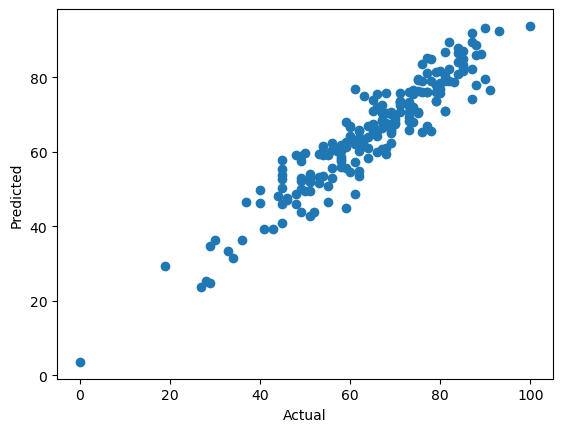

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

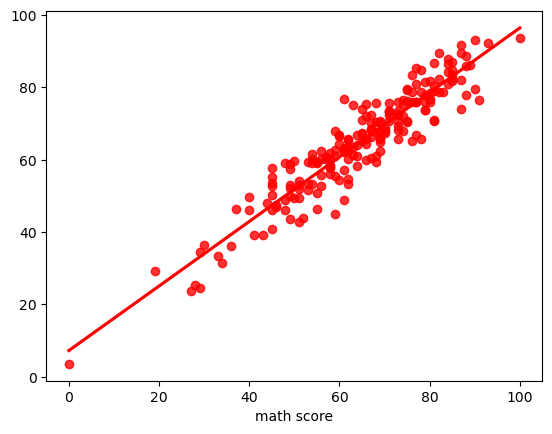

In [50]:
sns.regplot(x = y_test,y = y_pred,color ='red',ci = None)
# ci = confidence interval 


Difference between Actual and Predicted Values

In [52]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted values':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted values,Difference
521,91,76.5000,14.5000
737,53,59.3125,-6.3125
740,80,76.6875,3.3125
660,74,76.6250,-2.6250
411,84,87.8125,-3.8125
...,...,...,...
408,52,43.8125,8.1875
332,62,62.4375,-0.4375
208,74,67.8750,6.1250
613,65,67.1250,-2.1250
